# CA 2

## The purpose of this project is to categorize the data using Naive Bayes Classification

## Naive Bayes Classification

##  In this method, we first calculate the required probabilities using the Train data and then use them to determine the class of Test data.

# Imports

In [98]:
import hazm
import copy
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from __future__ import unicode_literals

# Body

## Load Data

### load train data

In [2]:
train_dataframe = pd.read_csv("Data/divar_train.csv")

In [3]:
train_dataframe

,title,description,categories
0,بلبل خرمایی,سه عدد بلبل خرمایی سه ماهه.از وقتی جوجه بودن خ...,leisure-hobbies
1,عینک اسکی در حد,عینک اسکی دبل لنز مارک يو وكس در حد نو اصلی م...,leisure-hobbies
2,تکیه سر تویوتا پرادو,پارچه ای سالم و تمیز.,vehicles
3,مجسمه کریستال24%,مجسمه دکوری کریستال بالرین Rcr24%,for-the-home
4,کیف و ساک,هر 2 کاملا تمیز هستند,personal
...,...,...,...
10195,ان هاش 85,نیمه دوم همه چی به شرط در حد خشک 260تا کار,vehicles
10196,405 دوگانه کارخانه. تمیز,فابریک 4 حلقه لاستیک 205 نو بیمه یکسال تخفیف ب...,vehicles
10197,بخاری گازی دودکش دار پلار,بخاری نو و بسیار تمیز هستش\nبا مشتری واقعی کنا...,for-the-home
10198,نر کله برنجی چتری,سلام به دلیل کمبود جا واسباب کشی به کمترین قیم...,leisure-hobbies


### As seen above , train data was loaded successfully.

### load test data

In [4]:
test_dataframe = pd.read_csv("Data/divar_test.csv")

In [5]:
test_dataframe

,title,description,categories
0,کیف مجلسی نو,کیف مجلسی نوی نو,personal
1,دیوار کوب نمدی تزیینی,مناسب برای جهاز عروس,for-the-home
2,دو تیکه بسیار بسیار تمیز و سالم,با کشوی مخفی و شیک,for-the-home
3,مودم,سلام مودم سالم با وسایلش،دیگه ب کارم نمیاد \nم...,electronic-devices
4,تعداد18عددبوقلمون به قیمت عمده,سلام تعدای بوقلمون دارم به علت جابه جایی به فر...,leisure-hobbies
...,...,...,...
1795,باسکول 300کیلویی,سالمه سالمه بشرط\nقیمت نوش داخل بازار600تومنه,businesses
1796,میز مدیریتی با کنفرانس,میز مدیریتی با کنفرانس \nتمیز سالم بدون خط و خش,businesses
1797,باند aiwa,سالم،با اسپیکر,electronic-devices
1798,عروس هلندی مولد,پنج تا عروس هلندی، دو جفت ویک تک،یه جفتش دم ت...,leisure-hobbies


### As seen above , test data was loaded successfully.

## Data Preprocess

### combine title and description

In [6]:
train_dataframe['data'] = train_dataframe['title'] + " " + train_dataframe['description']

In [7]:
train_dataframe = train_dataframe.drop(['title', 'description'], axis = 1)

In [8]:
train_dataframe

,categories,data
0,leisure-hobbies,بلبل خرمایی سه عدد بلبل خرمایی سه ماهه.از وقتی...
1,leisure-hobbies,عینک اسکی در حد عینک اسکی دبل لنز مارک يو وكس ...
2,vehicles,تکیه سر تویوتا پرادو پارچه ای سالم و تمیز.
3,for-the-home,مجسمه کریستال24% مجسمه دکوری کریستال بالرین Rc...
4,personal,کیف و ساک هر 2 کاملا تمیز هستند
...,...,...
10195,vehicles,ان هاش 85 نیمه دوم همه چی به شرط در حد خشک 260...
10196,vehicles,405 دوگانه کارخانه. تمیز فابریک 4 حلقه لاستیک ...
10197,for-the-home,بخاری گازی دودکش دار پلار بخاری نو و بسیار تمی...
10198,leisure-hobbies,نر کله برنجی چتری سلام به دلیل کمبود جا واسباب...


In [9]:
test_dataframe['data'] = test_dataframe['title'] + " " + test_dataframe['description']

In [10]:
test_dataframe = test_dataframe.drop(['title', 'description'], axis = 1)

In [11]:
test_dataframe

,categories,data
0,personal,کیف مجلسی نو کیف مجلسی نوی نو
1,for-the-home,دیوار کوب نمدی تزیینی مناسب برای جهاز عروس
2,for-the-home,دو تیکه بسیار بسیار تمیز و سالم با کشوی مخفی و...
3,electronic-devices,مودم سلام مودم سالم با وسایلش،دیگه ب کارم نمیا...
4,leisure-hobbies,تعداد18عددبوقلمون به قیمت عمده سلام تعدای بوقل...
...,...,...
1795,businesses,باسکول 300کیلویی سالمه سالمه بشرط\nقیمت نوش دا...
1796,businesses,میز مدیریتی با کنفرانس میز مدیریتی با کنفرانس ...
1797,electronic-devices,باند aiwa سالم،با اسپیکر
1798,leisure-hobbies,عروس هلندی مولد پنج تا عروس هلندی، دو جفت ویک...


### normalize data

In [12]:
normalizer = hazm.Normalizer()

In [13]:
train_dataframe['data'] = train_dataframe['data'].apply(normalizer.normalize)

In [14]:
train_dataframe

,categories,data
0,leisure-hobbies,بلبل خرمایی سه عدد بلبل خرمایی سه ماهه. از وقت...
1,leisure-hobbies,عینک اسکی در حد عینک اسکی دبل لنز مارک یو وکس ...
2,vehicles,تکیه سر تویوتا پرادو پارچه‌ای سالم و تمیز.
3,for-the-home,مجسمه کریستال۲۴٪ مجسمه دکوری کریستال بالرین Rc...
4,personal,کیف و ساک هر ۲ کاملا تمیز هستند
...,...,...
10195,vehicles,ان هاش ۸۵ نیمه دوم همه چی به شرط در حد خشک ۲۶۰...
10196,vehicles,۴۰۵ دوگانه کارخانه. تمیز فابریک ۴ حلقه لاستیک ...
10197,for-the-home,بخاری گازی دودکش دار پلار بخاری نو و بسیار تمی...
10198,leisure-hobbies,نر کله برنجی چتری سلام به دلیل کمبود جا واسباب...


In [15]:
test_dataframe['data'] = test_dataframe['data'].apply(normalizer.normalize)

In [16]:
test_dataframe

,categories,data
0,personal,کیف مجلسی نو کیف مجلسی نوی نو
1,for-the-home,دیوار کوب نمدی تزیینی مناسب برای جهاز عروس
2,for-the-home,دو تیکه بسیار بسیار تمیز و سالم با کشوی مخفی و...
3,electronic-devices,مودم سلام مودم سالم با وسایلش، دیگه ب کارم نمی...
4,leisure-hobbies,تعداد۱۸عددبوقلمون به قیمت عمده سلام تعدای بوقل...
...,...,...
1795,businesses,باسکول ۳۰۰کیلویی سالمه سالمه بشرط\nقیمت نوش دا...
1796,businesses,میز مدیریتی با کنفرانس میز مدیریتی با کنفرانس ...
1797,electronic-devices,باند aiwa سالم، با اسپیکر
1798,leisure-hobbies,عروس هلندی مولد پنج تا عروس هلندی، دو جفت ویک ...


### extract words from data

In [17]:
train_dataframe['data'] = train_dataframe['data'].apply(hazm.word_tokenize)

In [18]:
train_dataframe

,categories,data
0,leisure-hobbies,"[بلبل, خرمایی, سه, عدد, بلبل, خرمایی, سه, ماهه..."
1,leisure-hobbies,"[عینک, اسکی, در, حد, عینک, اسکی, دبل, لنز, مار..."
2,vehicles,"[تکیه, سر, تویوتا, پرادو, پارچه‌ای, سالم, و, ت..."
3,for-the-home,"[مجسمه, کریستال, ۲۴, ٪, مجسمه, دکوری, کریستال,..."
4,personal,"[کیف, و, ساک, هر, ۲, کاملا, تمیز, هستند]"
...,...,...
10195,vehicles,"[ان, هاش, ۸۵, نیمه, دوم, همه, چی, به, شرط, در,..."
10196,vehicles,"[۴۰۵, دوگانه, کارخانه, ., تمیز, فابریک, ۴, حلق..."
10197,for-the-home,"[بخاری, گازی, دودکش, دار, پلار, بخاری, نو, و, ..."
10198,leisure-hobbies,"[نر, کله, برنجی, چتری, سلام, به, دلیل, کمبود, ..."


In [19]:
test_dataframe['data'] = test_dataframe['data'].apply(hazm.word_tokenize)

In [20]:
test_dataframe

,categories,data
0,personal,"[کیف, مجلسی, نو, کیف, مجلسی, نوی, نو]"
1,for-the-home,"[دیوار, کوب, نمدی, تزیینی, مناسب, برای, جهاز, ..."
2,for-the-home,"[دو, تیکه, بسیار, بسیار, تمیز, و, سالم, با, کش..."
3,electronic-devices,"[مودم, سلام, مودم, سالم, با, وسایلش, ،, دیگه, ..."
4,leisure-hobbies,"[تعداد, ۱۸, عددبوقلمون, به, قیمت, عمده, سلام, ..."
...,...,...
1795,businesses,"[باسکول, ۳۰۰, کیلویی, سالمه, سالمه, بشرط, قیمت..."
1796,businesses,"[میز, مدیریتی, با, کنفرانس, میز, مدیریتی, با, ..."
1797,electronic-devices,"[باند, aiwa, سالم, ،, با, اسپیکر]"
1798,leisure-hobbies,"[عروس, هلندی, مولد, پنج, تا, عروس, هلندی, ،, د..."


### remove some words like stop words

In [21]:
extra_words = ['.', ',', ';', ':', '?', '!', '(', ')', '_', '-', '»', '«', '؟', 'ـ', 'و' ,'،' , 'با' , 'به']

In [22]:
train_dataframe['data'] = train_dataframe['data'].apply(lambda data : [w for w in data if w not in extra_words])

In [23]:
train_dataframe

,categories,data
0,leisure-hobbies,"[بلبل, خرمایی, سه, عدد, بلبل, خرمایی, سه, ماهه..."
1,leisure-hobbies,"[عینک, اسکی, در, حد, عینک, اسکی, دبل, لنز, مار..."
2,vehicles,"[تکیه, سر, تویوتا, پرادو, پارچه‌ای, سالم, تمیز]"
3,for-the-home,"[مجسمه, کریستال, ۲۴, ٪, مجسمه, دکوری, کریستال,..."
4,personal,"[کیف, ساک, هر, ۲, کاملا, تمیز, هستند]"
...,...,...
10195,vehicles,"[ان, هاش, ۸۵, نیمه, دوم, همه, چی, شرط, در, حد,..."
10196,vehicles,"[۴۰۵, دوگانه, کارخانه, تمیز, فابریک, ۴, حلقه, ..."
10197,for-the-home,"[بخاری, گازی, دودکش, دار, پلار, بخاری, نو, بسی..."
10198,leisure-hobbies,"[نر, کله, برنجی, چتری, سلام, دلیل, کمبود, جا, ..."


In [24]:
test_dataframe['data'] = test_dataframe['data'].apply(lambda data : [w for w in data if w not in extra_words])

In [25]:
test_dataframe

,categories,data
0,personal,"[کیف, مجلسی, نو, کیف, مجلسی, نوی, نو]"
1,for-the-home,"[دیوار, کوب, نمدی, تزیینی, مناسب, برای, جهاز, ..."
2,for-the-home,"[دو, تیکه, بسیار, بسیار, تمیز, سالم, کشوی, مخف..."
3,electronic-devices,"[مودم, سلام, مودم, سالم, وسایلش, دیگه, ب, کارم..."
4,leisure-hobbies,"[تعداد, ۱۸, عددبوقلمون, قیمت, عمده, سلام, تعدا..."
...,...,...
1795,businesses,"[باسکول, ۳۰۰, کیلویی, سالمه, سالمه, بشرط, قیمت..."
1796,businesses,"[میز, مدیریتی, کنفرانس, میز, مدیریتی, کنفرانس,..."
1797,electronic-devices,"[باند, aiwa, سالم, اسپیکر]"
1798,leisure-hobbies,"[عروس, هلندی, مولد, پنج, تا, عروس, هلندی, دو, ..."


### stemming

#### Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

In [26]:
stemmed_train_df = copy.deepcopy(train_dataframe)
stemmed_test_df = copy.deepcopy(test_dataframe)

In [27]:
stemmer = hazm.Stemmer()

In [28]:
stemmed_train_df['data'] = stemmed_train_df['data'].apply(lambda data : [stemmer.stem(w) for w in data])

In [29]:
stemmed_train_df

,categories,data
0,leisure-hobbies,"[بلبل, خرما, سه, عدد, بلبل, خرما, سه, ماهه, از..."
1,leisure-hobbies,"[عینک, اسک, در, حد, عینک, اسک, دبل, لنز, مارک,..."
2,vehicles,"[تکیه, سر, تویوتا, پرادو, پارچه, سال, تمیز]"
3,for-the-home,"[مجسمه, کریستال, ۲۴, ٪, مجسمه, دکور, کریستال, ..."
4,personal,"[کیف, ساک, هر, ۲, کاملا, تمیز, هستند]"
...,...,...
10195,vehicles,"[, , ۸۵, نیمه, دو, همه, چ, شرط, در, حد, خشک, ۲..."
10196,vehicles,"[۴۰۵, دوگانه, کارخانه, تمیز, فابریک, ۴, حلقه, ..."
10197,for-the-home,"[بخار, گاز, دودک, دار, پلار, بخار, نو, بسیار, ..."
10198,leisure-hobbies,"[نر, کله, برنج, چتر, سلا, دلیل, کمبود, جا, واس..."


In [30]:
stemmed_test_df['data'] = stemmed_test_df['data'].apply(lambda data : [stemmer.stem(w) for w in data])

In [31]:
stemmed_test_df

,categories,data
0,personal,"[کیف, مجلس, نو, کیف, مجلس, نو, نو]"
1,for-the-home,"[دیوار, کوب, نمد, تزیین, مناسب, برا, جهاز, عروس]"
2,for-the-home,"[دو, تیکه, بسیار, بسیار, تمیز, سال, کشو, مخف, ..."
3,electronic-devices,"[مود, سلا, مود, سال, وسایل, دیگه, ب, کار, نمیا..."
4,leisure-hobbies,"[تعداد, ۱۸, عددبوقلمون, قیم, عمده, سلا, تعدا, ..."
...,...,...
1795,businesses,"[باسکول, ۳۰۰, کیلو, سالمه, سالمه, بشرط, قیم, ن..."
1796,businesses,"[میز, مدیریت, کنفرانس, میز, مدیریت, کنفرانس, ت..."
1797,electronic-devices,"[باند, aiwa, سال, اسپیکر]"
1798,leisure-hobbies,"[عروس, هلند, مولد, پنج, تا, عروس, هلند, دو, جف..."


### lemmatization

#### Lemmatization is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

In [32]:
lemmatized_train_df = copy.deepcopy(train_dataframe)
lemmatized_test_df = copy.deepcopy(test_dataframe)

In [33]:
lemmatizer = hazm.Lemmatizer()

In [34]:
lemmatized_train_df['data'] = lemmatized_train_df['data'].apply(lambda data : [lemmatizer.lemmatize(w) for w in data])

In [35]:
lemmatized_train_df

,categories,data
0,leisure-hobbies,"[بلبل, خرما, سه, عدد, بلبل, خرما, سه, ماهه, از..."
1,leisure-hobbies,"[عینک, اسکی, در, حد, عینک, اسکی, دبل, لنز, مار..."
2,vehicles,"[تکیه, سر, تویوتا, پرادو, پارچه, سالم, تمیز]"
3,for-the-home,"[مجسمه, کریستال, ۲۴, ٪, مجسمه, دکوری, کریستال,..."
4,personal,"[کیف, ساک, هر, ۲, کاملا, تمیز, #هست]"
...,...,...
10195,vehicles,"[ان, هاش, ۸۵, نیمه, دوم, همه, چی, شرط, در, حد,..."
10196,vehicles,"[۴۰۵, دوگانه, کارخانه, تمیز, فابریک, ۴, حلقه, ..."
10197,for-the-home,"[بخاری, گازی, دودکش, دار, پلار, بخاری, نو, بسی..."
10198,leisure-hobbies,"[نر, کله, برنجی, چتر, سلام, دلیل, کمبود, جا, و..."


In [36]:
lemmatized_test_df['data'] = lemmatized_test_df['data'].apply(lambda data : [lemmatizer.lemmatize(w) for w in data])

In [37]:
lemmatized_test_df

,categories,data
0,personal,"[کیف, مجلس, نو, کیف, مجلس, نو, نو]"
1,for-the-home,"[دیوار, کوب, نمد, تزیین, مناسب, برای, جهاز, عروس]"
2,for-the-home,"[دو, تیکه, بسیار, بسیار, تمیز, سالم, کشو, مخفی..."
3,electronic-devices,"[مودم, سلام, مودم, سالم, وسایل, دیگه, ب, کاشت#..."
4,leisure-hobbies,"[تعداد, ۱۸, عددبوقلمون, قیمت, عمده, سلام, تعدا..."
...,...,...
1795,businesses,"[باسکول, ۳۰۰, کیلویی, سالمه, سالمه, بشرط, قیمت..."
1796,businesses,"[میز, مدیریت, کنفرانس, میز, مدیریت, کنفرانس, ت..."
1797,electronic-devices,"[باند, aiwa, سالم, اسپیکر]"
1798,leisure-hobbies,"[عروس, هلند, مولد, پنج, تا, عروس, هلند, دو, جف..."


## Problem Process

### Posterior : Probability of being a member of a particular class provided a particular word occurs
#### It is calculated using the formula and values of Likelihood and Prior

### Prior : Probability of being a member of a particular class
#### It is calculated using the Train Data

### Likelihood : Probability of a particular word occurring in a particular class
#### It is calculated using the Train Data

### Evidence : Probability of a particular word occurring
#### We dont need to calculate this

## Calculate Probabilities

In [38]:
grouped = train_dataframe.groupby(train_dataframe['categories'])

In [39]:
categories = [[c, 0] for c in train_dataframe['categories'].unique()]

In [40]:
count = list(train_dataframe.value_counts('categories'))

In [41]:
for i in range(0, len(categories)):
    categories[i][1] = count[i]

In [42]:
categories

[['leisure-hobbies', 1700],
 ['vehicles', 1700],
 ['for-the-home', 1700],
 ['personal', 1700],
 ['electronic-devices', 1700],
 ['businesses', 1700]]

In [43]:
grouped_train_df = []
for category in categories:
    grouped_train_df.append([category[0], grouped.get_group(category[0])])

In [44]:
for df in grouped_train_df:
    print("category :", df[0])
    print(df[1])

category : leisure-hobbies
            categories                                               data
0      leisure-hobbies  [بلبل, خرمایی, سه, عدد, بلبل, خرمایی, سه, ماهه...
1      leisure-hobbies  [عینک, اسکی, در, حد, عینک, اسکی, دبل, لنز, مار...
6      leisure-hobbies  [فروش, دوچرخه, ۲۰, بخاطر, جابجایی, قصد, فروش, ...
9      leisure-hobbies  [چادر, ١٠, نفره, نونونو, قیمت, مناسب, چادر, ده...
12     leisure-hobbies     [کبوتر, سفید, باسلام, یک, سفید, نر, پرشی, هست]
...                ...                                                ...
10181  leisure-hobbies  [دوچرخه, طبی, دوچرخه, طبی, پزشکی, قوی, محکم, ش...
10189  leisure-hobbies  [دوچرخه, بیست, دنده‌ای, دوچرخه, بیست, دنده‌ای,...
10190  leisure-hobbies                    [کتاب, درسی, ۱۳۳۶, فلسفه, منطق]
10191  leisure-hobbies  [قفس, پرنده, نو, مخصوص, انواع, پرنده, ابعاد, ۳...
10198  leisure-hobbies  [نر, کله, برنجی, چتری, سلام, دلیل, کمبود, جا, ...

[1700 rows x 2 columns]
category : vehicles
      categories                        

### As seen above , main dataframe is split according to the categories

In [45]:
for group in grouped_train_df:
    group[1] = group[1].drop(['categories'], axis = 1)

In [46]:
for df in grouped_train_df:
    print("category :", df[0])
    print(df[1])

category : leisure-hobbies
                                                    data
0      [بلبل, خرمایی, سه, عدد, بلبل, خرمایی, سه, ماهه...
1      [عینک, اسکی, در, حد, عینک, اسکی, دبل, لنز, مار...
6      [فروش, دوچرخه, ۲۰, بخاطر, جابجایی, قصد, فروش, ...
9      [چادر, ١٠, نفره, نونونو, قیمت, مناسب, چادر, ده...
12        [کبوتر, سفید, باسلام, یک, سفید, نر, پرشی, هست]
...                                                  ...
10181  [دوچرخه, طبی, دوچرخه, طبی, پزشکی, قوی, محکم, ش...
10189  [دوچرخه, بیست, دنده‌ای, دوچرخه, بیست, دنده‌ای,...
10190                    [کتاب, درسی, ۱۳۳۶, فلسفه, منطق]
10191  [قفس, پرنده, نو, مخصوص, انواع, پرنده, ابعاد, ۳...
10198  [نر, کله, برنجی, چتری, سلام, دلیل, کمبود, جا, ...

[1700 rows x 1 columns]
category : vehicles
                                                    data
2        [تکیه, سر, تویوتا, پرادو, پارچه‌ای, سالم, تمیز]
10     [قاب, فرمان, دسته, راهنما, یکعدد, دسته, راهنما...
11     [پراید, مدل, ۸۵, سلام, رنگ, یشمی, بیمه, تا, بر...
14     [پراید, ی

### delete categories from dataframe

In [47]:
g_tr_df = []
for df in grouped_train_df:
    all_words = [df[0], []]
    for data in df[1]['data']:
        all_words[1] = all_words[1] + data
    g_tr_df.append([all_words[0], pd.DataFrame({'words' : all_words[1]})])
    
grouped_train_df = g_tr_df

In [48]:
for df in grouped_train_df:
    print("category :", df[0])
    print(df[1])

category : leisure-hobbies
        words
0        بلبل
1      خرمایی
2          سه
3         عدد
4        بلبل
...       ...
31913    لطفا
31914   مشتری
31915   واقعی
31916    تماس
31917   بگیرد

[31918 rows x 1 columns]
category : vehicles
          words
0          تکیه
1            سر
2        تویوتا
3         پرادو
4      پارچه‌ای
...         ...
33357     یکسال
33358      بیمه
33359        تا
33360       برج
33361        ۸.

[33362 rows x 1 columns]
category : for-the-home
         words
0        مجسمه
1      کریستال
2           ۲۴
3            ٪
4        مجسمه
...        ...
25751     هستش
25752    مشتری
25753    واقعی
25754     کنار
25755     میام

[25756 rows x 1 columns]
category : personal
           words
0            کیف
1            ساک
2             هر
3              ۲
4          کاملا
...          ...
28676  واقعالباس
28677     قشنگیه
28678      تخفیف
28679         هم
28680       داره

[28681 rows x 1 columns]
category : electronic-devices
          words
0      تلویزیون

### make dataframe of words for each category

In [49]:
for df in grouped_train_df:
    df[1]['count'] = df[1].groupby('words')['words'].transform('count')
grouped_train_df

[['leisure-hobbies',
          words  count
  0        بلبل     11
  1      خرمایی      2
  2          سه     84
  3         عدد    225
  4        بلبل     11
  ...       ...    ...
  31913    لطفا     84
  31914   مشتری     40
  31915   واقعی     83
  31916    تماس    190
  31917   بگیرد      8
  
  [31918 rows x 2 columns]],
 ['vehicles',
            words  count
  0          تکیه      1
  1            سر     32
  2        تویوتا     11
  3         پرادو      3
  4      پارچه‌ای      1
  ...         ...    ...
  33357     یکسال     46
  33358      بیمه    737
  33359        تا    348
  33360       برج    161
  33361        ۸.      3
  
  [33362 rows x 2 columns]],
 ['for-the-home',
           words  count
  0        مجسمه     19
  1      کریستال     29
  2           ۲۴      8
  3            ٪      5
  4        مجسمه     19
  ...        ...    ...
  25751     هستش     16
  25752    مشتری     29
  25753    واقعی     62
  25754     کنار     14
  25755     میام      9
  
  [25756 rows x 

### count number of each words

In [50]:
for df in grouped_train_df:
    df[1].sort_values('count', inplace = True, ascending = False)
    df[1].drop_duplicates(keep='first', inplace = True, ignore_index = True)
grouped_train_df

[['leisure-hobbies',
            words  count
  0          سالم    386
  1           جفت    342
  2            یک    335
  3            نر    299
  4          ماده    295
  ...         ...    ...
  6297  درشهرستان      1
  6298     وطلایی      1
  6299      مکعبی      1
  6300     چرخدار      1
  6301       ارسی      1
  
  [6302 rows x 2 columns]],
 ['vehicles',
             words  count
  0           بیمه    737
  1           سالم    711
  2            رنگ    702
  3            مدل    581
  4           بدون    511
  ...          ...    ...
  5545  دوتابالایی      1
  5546  ۴عددلاستیک      1
  5547         ای۲      1
  5548         ٧٠٠      1
  5549        تکیه      1
  
  [5550 rows x 2 columns]],
 ['for-the-home',
            words  count
  0            نو    514
  1          سالم    513
  2           میز    472
  3            در    388
  4           مبل    331
  ...         ...    ...
  4396    رویه‌ها      1
  4397  مختلف$NUM      1
  4398      ببندی      1
  4399        …با      

## Calculate numbers for Stemmed Train DataFrame

In [51]:
grouped = stemmed_train_df.groupby(stemmed_train_df['categories'])

In [52]:
grouped_stemmed_train_df = []
for category in categories:
    grouped_stemmed_train_df.append([category[0], grouped.get_group(category[0])])

In [53]:
for group in grouped_stemmed_train_df:
    group[1] = group[1].drop(['categories'], axis = 1)

### delete categories from dataframe

In [54]:
g_tr_df = []
for df in grouped_stemmed_train_df:
    all_words = [df[0], []]
    for data in df[1]['data']:
        all_words[1] = all_words[1] + data
    g_tr_df.append([all_words[0], pd.DataFrame({'words' : all_words[1]})])
    
grouped_stemmed_train_df = g_tr_df

### make dataframe of words for each category

In [55]:
for df in grouped_stemmed_train_df:
    df[1]['count'] = df[1].groupby('words')['words'].transform('count')

### count number of each words

In [56]:
for df in grouped_stemmed_train_df:
    df[1].sort_values('count', inplace = True, ascending = False)
    df[1].drop_duplicates(keep='first', inplace = True, ignore_index = True)
grouped_stemmed_train_df

[['leisure-hobbies',
           words  count
  0          سال    435
  1           یک    371
  2           جف    346
  3           نر    316
  4           در    309
  ...        ...    ...
  5449       بدم      1
  5450  اوربیترک      1
  5451       مگن      1
  5452        چخ      1
  5453      دعور      1
  
  [5454 rows x 2 columns]],
 ['vehicles',
            words  count
  0           سال   1027
  1          بیمه    739
  2           رنگ    721
  3           مدل    585
  4          بدون    511
  ...         ...    ...
  4970  پاورویندز      1
  4971   میکروفون      1
  4972   سنسورعقب      1
  4973      سااال      1
  4974       تکیه      1
  
  [4975 rows x 2 columns]],
 ['for-the-home',
         words  count
  0        سال    535
  1         نو    525
  2        میز    477
  3        مبل    472
  4         در    388
  ...      ...    ...
  3826  مصنوعى      1
  3827   -اینه      1
  3828   وباکس      1
  3829     قوچ      1
  3830   دوبله      1
  
  [3831 rows x 2 columns]],
 [

## Calculate numbers for Lemmatized Train DataFrame

In [57]:
grouped = lemmatized_train_df.groupby(lemmatized_train_df['categories'])

In [58]:
grouped_lemmatized_train_df = []
for category in categories:
    grouped_lemmatized_train_df.append([category[0], grouped.get_group(category[0])])

In [59]:
for group in grouped_lemmatized_train_df:
    group[1] = group[1].drop(['categories'], axis = 1)

### delete categories from dataframe

In [60]:
g_tr_df = []
for df in grouped_lemmatized_train_df:
    all_words = [df[0], []]
    for data in df[1]['data']:
        all_words[1] = all_words[1] + data
    g_tr_df.append([all_words[0], pd.DataFrame({'words' : all_words[1]})])
    
grouped_lemmatized_train_df = g_tr_df

### make dataframe of words for each category

In [61]:
for df in grouped_lemmatized_train_df:
    df[1]['count'] = df[1].groupby('words')['words'].transform('count')

### count number of each words

In [62]:
for df in grouped_lemmatized_train_df:
    df[1].sort_values('count', inplace = True, ascending = False)
    df[1].drop_duplicates(keep='first', inplace = True, ignore_index = True)
grouped_lemmatized_train_df

[['leisure-hobbies',
        words  count
  0      سالم    386
  1       جفت    382
  2        یک    366
  3        نر    311
  4      قیمت    301
  ...     ...    ...
  5656   Size      1
  5657     ۴۲      1
  5658     ,۵      1
  5659  قوارش      1
  5660     ٢١      1
  
  [5661 rows x 2 columns]],
 ['vehicles',
         words  count
  0       بیمه    739
  1        رنگ    721
  2       سالم    711
  3        مدل    581
  4       بدون    511
  ...      ...    ...
  5095  سااالم      1
  5096     شتر      1
  5097   جهرمه      1
  5098  وایراد      1
  5099    تکیه      1
  
  [5100 rows x 2 columns]],
 ['for-the-home',
            words  count
  0            نو    522
  1          سالم    513
  2           میز    476
  3           مبل    472
  4            در    388
  ...         ...    ...
  3956       -شیک      1
  3957  و۶مترخیلی      1
  3958    تمیز███      1
  3959      ارائه      1
  3960        صدف      1
  
  [3961 rows x 2 columns]],
 ['personal',
          words  count
 

## Bigrams

### Example : 1. I left my bag in class.
### 2. I put my phone in the left packet of my jeens.

#### In this example using bigram can help to find the right meaning of "left" word. 

## ‫‪Additive‬‬ ‫‪Smoothing‬‬

### 4. This is because Naive Bayes  formula, calculates probability that the object is relevant to that category equal to one.
### If the word in test data doesn't exist in train data , then the probability of it in the Naive Bayes formula, equals to 0 and therefore, the probability of being a member of each class, that calculates from Naive Bayes formula,  equals to zero and then the model can't decide witch class is better than others.

### 5. In Additive Smoothing, we consider a little number like alpha for probability of any words that are not exist in train data. Therefore the probability of being a member of each class, that calculates from Naive Bayes formula, is gratter than 0 and then the model can decide witch class is better than others.
eg : Lets say you have three words A,B,C . They are present in your sentences which you are classifying into either positive or negative sentiments.

So your dependent is a class : Positive or Negative

Predictors are the words ( all which may not be present in a sentence)

P(Class = Positive | X1 = A, X2 = B, X3 = C) = (P(X1 = A | Class = Positive)*P(X2 = B | Class = Positive)*P(X1 = C | Class = Positive)*P(Class = Positive) / (P(X1 = A)*P(X2 = B)*P(X3 = C)

Now lets say , you have another word in the sentence of the test case X4 = D , unfortunately none of your train cases had this D ,

P(X1 = D | Class = Positive) = 0 , right ?

this will make the entire probability zero … so you prevent such a thing from happening, you add in a smoothing or additive smoothing component

without smoothing
P(X1 = A | Class = Positive) = (Number of cases of A when Class Positive/Sum of Cases A+B+C)

with smoothing
P(X1 = A | Class = Positive) = (Number of cases of A when Class Positive + alpha/Sum of Cases A+B+C + alpha)
Here alpha is your smoothing component

You will get the following expression below with smoothing alpha = 1
P(X1 = D | Class = Positive) = 1

resource : https://discuss.analyticsvidhya.com/t/what-is-additive-smoothing/3484

## Verification

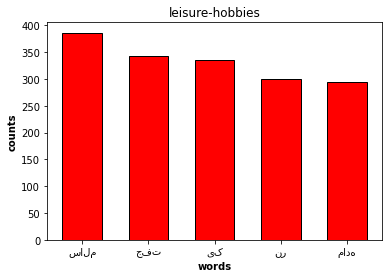

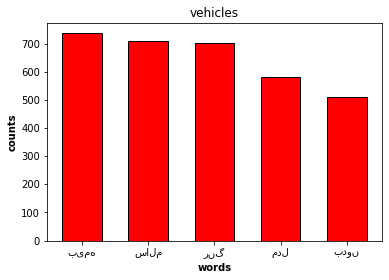

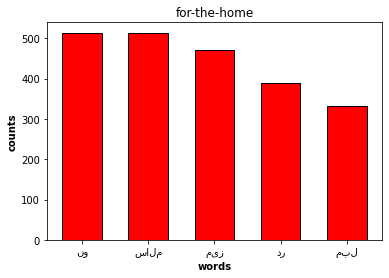

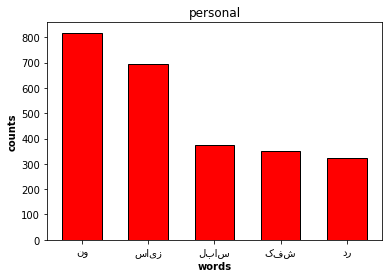

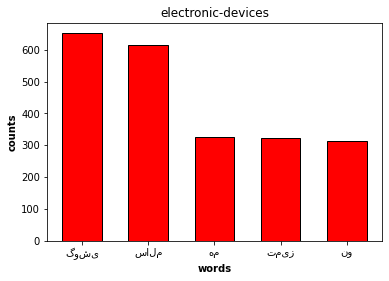

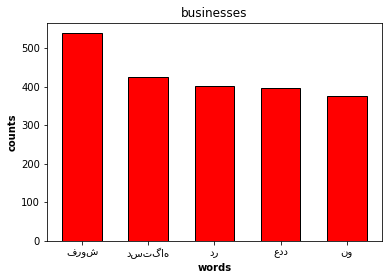

In [63]:
for df in grouped_train_df:
    x = list(df[1].head()['words'])
    y = list(df[1].head()['count'])
    plt.bar(x, y, color ='red', width = 0.6, edgecolor ='black')
    plt.title(df[0])
    plt.xlabel('words', fontweight ='bold')
    plt.ylabel('counts', fontweight ='bold')
    plt.show()

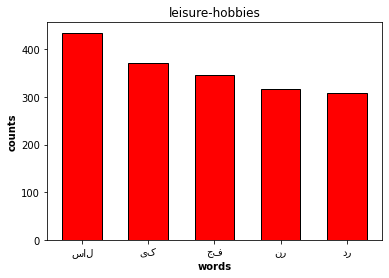

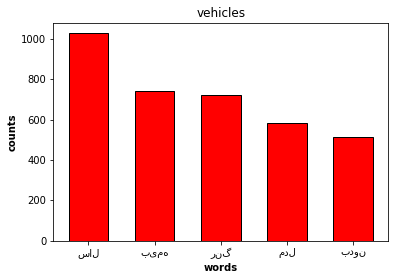

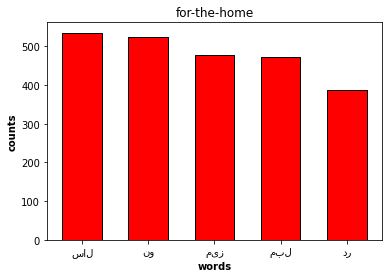

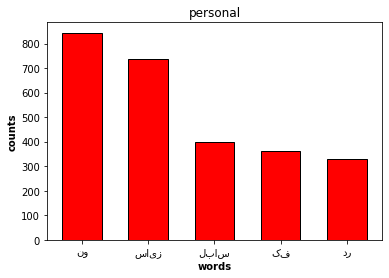

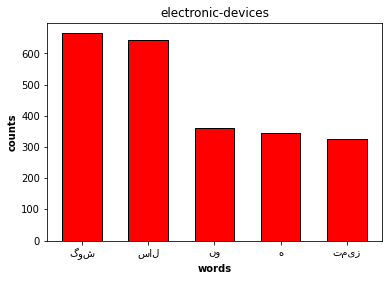

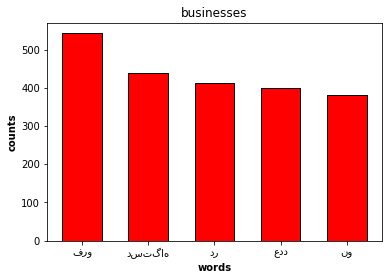

In [64]:
for df in grouped_stemmed_train_df:
    x = list(df[1].head()['words'])
    y = list(df[1].head()['count'])
    plt.bar(x, y, color ='red', width = 0.6, edgecolor ='black')
    plt.title(df[0])
    plt.xlabel('words', fontweight ='bold')
    plt.ylabel('counts', fontweight ='bold')
    plt.show()

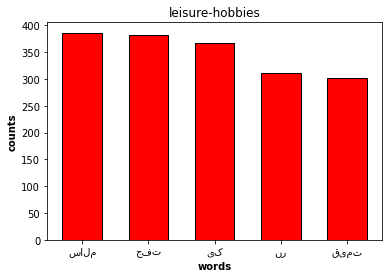

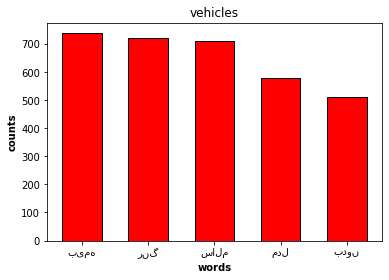

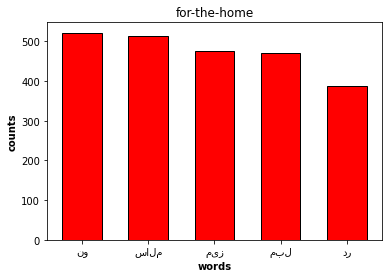

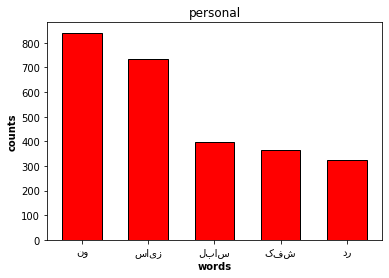

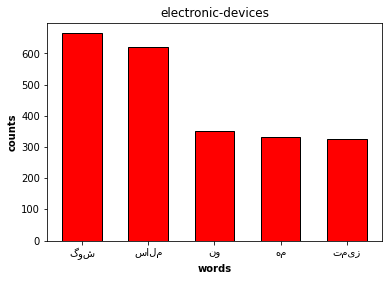

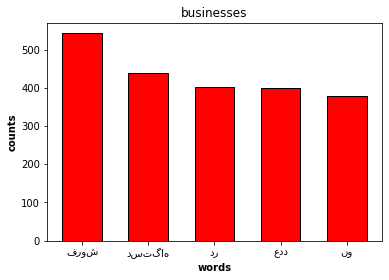

In [65]:
for df in grouped_lemmatized_train_df:
    x = list(df[1].head()['words'])
    y = list(df[1].head()['count'])
    plt.bar(x, y, color ='red', width = 0.6, edgecolor ='black')
    plt.title(df[0])
    plt.xlabel('words', fontweight ='bold')
    plt.ylabel('counts', fontweight ='bold')
    plt.show()

## Evaluation

### 7. Because in some models, the number of detected class is low but the number of correct detected class is high then the Precision value will be high but Recall value will be low. And in other models, the number of detected class is more than first models and the number of correct detected class is also more than first models but the rato of the correct detected class to the all detected class is less than first models(because of more detected data), so in this models, the Precision will be less than the first model but the Recall will be more then first models.
### So we need to consider both of Recall and Precisin to evaluate models.

### 8. The harmonic mean.
### The harmonic mean is a type of numerical average. It is calculated by dividing the number of observations by the reciprocal of each number in the series. Thus, the harmonic mean is the reciprocal of the arithmetic mean of the reciprocals. The harmonic mean is good at handling large outliers. But small outliers will make things worse.
### An arithmetic average is the sum of a series of numbers divided by the count of that series of numbers. The large outliers can effect on the result but  small outliers not effect very much. 
### In this problem we want to give high score to the smaller value(Recall), so the harmonic mean is better than arithmetic average.


### 9.A macro-average will compute the metric independently for each class and then take the average hence treating all classes equally, whereas a micro-average will aggregate the contributions of all classes to compute the average metric.
### In weighted-average, we weight the score of each class by the number of samples from that class.
resorce: https://androidkt.com/micro-macro-averages-for-imbalance-multiclass-classification/

## Predict without Additive Smoothing

### Predict categories for test data

In [184]:
learned_df = dict(grouped_train_df)
learned_stemmed_df = dict(grouped_stemmed_train_df)
learned_lemmatized_df = dict(grouped_lemmatized_train_df)

In [185]:
test_dataframe['predict'] = 'empty'

In [186]:
s = 0
for cat in categories:
    s += cat[1]
for cat in categories:
    cat[1] = math.log(cat[1]/s)

In [ ]:
for i in test_dataframe.index:
    data = test_dataframe['data'][i]
    curr_cat_scores = copy.deepcopy(categories)
    for cat in curr_cat_scores:
        scores = learned_df[cat[0]]
        s = scores['count'].sum()
        for word in data:
            if word in scores.values:
                cat[1] += math.log((int(scores.loc[scores['words'] == word]['count'])) / s)
    mx = min([sublist[1] for sublist in curr_cat_scores])
    for cat in curr_cat_scores:
        if cat[1] == mx:
            test_dataframe['predict'][i] = cat[0]
            break
    

In [ ]:
test_dataframe

#### As seen above, the predict column filled.

### Predict categories for stemmed test data

In [ ]:
stemmed_test_df['predict'] = 'empty'

In [ ]:
for i in stemmed_test_df.index:
    data = stemmed_test_df['data'][i]
    curr_cat_scores = copy.deepcopy(categories)
    for cat in curr_cat_scores:
        scores = learned_stemmed_df[cat[0]]
        s = scores['count'].sum()
        for word in data:
            if word in scores.values:
                cat[1] += math.log((int(scores.loc[scores['words'] == word]['count'])) / s)
    mx = min([sublist[1] for sublist in curr_cat_scores])
    for cat in curr_cat_scores:
        if cat[1] == mx:
            stemmed_test_df['predict'][i] = cat[0]
            break
    

In [ ]:
stemmed_test_df

#### As seen above, the predict column filled.

### Predict categories for lemmatized test data

In [ ]:
lemmatized_test_df['predict'] = 'empty'

In [ ]:
for i in lemmatized_test_df.index:
    data = lemmatized_test_df['data'][i]
    curr_cat_scores = copy.deepcopy(categories)
    for cat in curr_cat_scores:
        scores = learned_lemmatized_df[cat[0]]
        s = scores['count'].sum()
        for word in data:
            if word in scores.values:
                cat[1] += math.log((int(scores.loc[scores['words'] == word]['count'])) / s)
    mx = min([sublist[1] for sublist in curr_cat_scores])
    for cat in curr_cat_scores:
        if cat[1] == mx:
            lemmatized_test_df['predict'][i] = cat[0]
            break
    

In [ ]:
lemmatized_test_df

#### As seen above, the predict column filled.

In [ ]:
correct_detected = 0
total = 0
for i in test_dataframe.index:
    if test_dataframe['predict'][i] == test_dataframe['categories'][i]:
        correct_detected += 1
    total += 1

In [ ]:
accuracy = correct_detected / total
print("Accuracy :",accuracy)

In [ ]:
correct_detected = 0
total = 0
for i in stemmed_test_df.index:
    if stemmed_test_df['predict'][i] == stemmed_test_df['categories'][i]:
        correct_detected += 1
    total += 1

In [ ]:
stemmed_accuracy = correct_detected / total
print("Stemmed Accuracy :",stemmed_accuracy)

In [ ]:
correct_detected = 0
total = 0
for i in lemmatized_test_df.index:
    if lemmatized_test_df['predict'][i] == lemmatized_test_df['categories'][i]:
        correct_detected += 1
    total += 1

In [ ]:
lemmatized_accuracy = correct_detected / total
print("Lemmatized Accuracy:",lemmatized_accuracy)

## Predict with Additive Smoothing

In [171]:
alpha = 0.00001

### Predict categories for test data

In [172]:
for i in test_dataframe.index:
    data = test_dataframe['data'][i]
    curr_cat_scores = copy.deepcopy(categories)
    for cat in curr_cat_scores:
        scores = learned_df[cat[0]]
        s = scores['count'].sum()
        for word in data:
            if word in scores.values:
                cat[1] += math.log((int(scores.loc[scores['words'] == word]['count'])) / s)
            else:
                cat[1] += math.log(alpha)
    mx = max([sublist[1] for sublist in curr_cat_scores])
    for cat in curr_cat_scores:
        if cat[1] == mx:
            test_dataframe['predict'][i] = cat[0]
            break
    

In [173]:
test_dataframe

,categories,data,predict
0,personal,"[کیف, مجلسی, نو, کیف, مجلسی, نوی, نو]",personal
1,for-the-home,"[دیوار, کوب, نمدی, تزیینی, مناسب, برای, جهاز, ...",for-the-home
2,for-the-home,"[دو, تیکه, بسیار, بسیار, تمیز, سالم, کشوی, مخف...",for-the-home
3,electronic-devices,"[مودم, سلام, مودم, سالم, وسایلش, دیگه, ب, کارم...",electronic-devices
4,leisure-hobbies,"[تعداد, ۱۸, عددبوقلمون, قیمت, عمده, سلام, تعدا...",leisure-hobbies
...,...,...,...
1795,businesses,"[باسکول, ۳۰۰, کیلویی, سالمه, سالمه, بشرط, قیمت...",for-the-home
1796,businesses,"[میز, مدیریتی, کنفرانس, میز, مدیریتی, کنفرانس,...",businesses
1797,electronic-devices,"[باند, aiwa, سالم, اسپیکر]",electronic-devices
1798,leisure-hobbies,"[عروس, هلندی, مولد, پنج, تا, عروس, هلندی, دو, ...",leisure-hobbies


#### As seen above, the predict column filled.

### Predict categories for stemmed test data

In [174]:
for i in stemmed_test_df.index:
    data = stemmed_test_df['data'][i]
    curr_cat_scores = copy.deepcopy(categories)
    for cat in curr_cat_scores:
        scores = learned_stemmed_df[cat[0]]
        s = scores['count'].sum()
        for word in data:
            if word in scores.values:
                cat[1] += math.log((int(scores.loc[scores['words'] == word]['count'])) / s)
            else:
                cat[1] += math.log(alpha)
    mx = max([sublist[1] for sublist in curr_cat_scores])
    for cat in curr_cat_scores:
        if cat[1] == mx:
            stemmed_test_df['predict'][i] = cat[0]
            break
    

In [175]:
stemmed_test_df

,categories,data,predict
0,personal,"[کیف, مجلس, نو, کیف, مجلس, نو, نو]",personal
1,for-the-home,"[دیوار, کوب, نمد, تزیین, مناسب, برا, جهاز, عروس]",for-the-home
2,for-the-home,"[دو, تیکه, بسیار, بسیار, تمیز, سال, کشو, مخف, ...",for-the-home
3,electronic-devices,"[مود, سلا, مود, سال, وسایل, دیگه, ب, کار, نمیا...",electronic-devices
4,leisure-hobbies,"[تعداد, ۱۸, عددبوقلمون, قیم, عمده, سلا, تعدا, ...",leisure-hobbies
...,...,...,...
1795,businesses,"[باسکول, ۳۰۰, کیلو, سالمه, سالمه, بشرط, قیم, ن...",electronic-devices
1796,businesses,"[میز, مدیریت, کنفرانس, میز, مدیریت, کنفرانس, ت...",businesses
1797,electronic-devices,"[باند, aiwa, سال, اسپیکر]",electronic-devices
1798,leisure-hobbies,"[عروس, هلند, مولد, پنج, تا, عروس, هلند, دو, جف...",leisure-hobbies


#### As seen above, the predict column filled.

### Predict categories for lemmatized test data

In [176]:
for i in lemmatized_test_df.index:
    data = lemmatized_test_df['data'][i]
    curr_cat_scores = copy.deepcopy(categories)
    for cat in curr_cat_scores:
        scores = learned_lemmatized_df[cat[0]]
        s = scores['count'].sum()
        for word in data:
            if word in scores.values:
                cat[1] += math.log((int(scores.loc[scores['words'] == word]['count'])) / s)
            else:
                cat[1] += math.log(alpha)
    mx = max([sublist[1] for sublist in curr_cat_scores])
    for cat in curr_cat_scores:
        if cat[1] == mx:
            lemmatized_test_df['predict'][i] = cat[0]
            break
    

In [177]:
lemmatized_test_df

,categories,data,predict
0,personal,"[کیف, مجلس, نو, کیف, مجلس, نو, نو]",personal
1,for-the-home,"[دیوار, کوب, نمد, تزیین, مناسب, برای, جهاز, عروس]",for-the-home
2,for-the-home,"[دو, تیکه, بسیار, بسیار, تمیز, سالم, کشو, مخفی...",for-the-home
3,electronic-devices,"[مودم, سلام, مودم, سالم, وسایل, دیگه, ب, کاشت#...",electronic-devices
4,leisure-hobbies,"[تعداد, ۱۸, عددبوقلمون, قیمت, عمده, سلام, تعدا...",leisure-hobbies
...,...,...,...
1795,businesses,"[باسکول, ۳۰۰, کیلویی, سالمه, سالمه, بشرط, قیمت...",electronic-devices
1796,businesses,"[میز, مدیریت, کنفرانس, میز, مدیریت, کنفرانس, ت...",businesses
1797,electronic-devices,"[باند, aiwa, سالم, اسپیکر]",electronic-devices
1798,leisure-hobbies,"[عروس, هلند, مولد, پنج, تا, عروس, هلند, دو, جف...",leisure-hobbies


#### As seen above, the predict column filled.

In [178]:
correct_detected = 0
total = 0
for i in test_dataframe.index:
    if test_dataframe['predict'][i] == test_dataframe['categories'][i]:
        correct_detected += 1
    total += 1

In [179]:
accuracy = correct_detected / total
print("Accuracy :",accuracy)

Accuracy : 0.8727777777777778


In [180]:
correct_detected = 0
total = 0
for i in stemmed_test_df.index:
    if stemmed_test_df['predict'][i] == stemmed_test_df['categories'][i]:
        correct_detected += 1
    total += 1

In [181]:
stemmed_accuracy = correct_detected / total
print("Stemmed Accuracy :",stemmed_accuracy)

Stemmed Accuracy : 0.8711111111111111


In [182]:
correct_detected = 0
total = 0
for i in lemmatized_test_df.index:
    if lemmatized_test_df['predict'][i] == lemmatized_test_df['categories'][i]:
        correct_detected += 1
    total += 1

In [183]:
lemmatized_accuracy = correct_detected / total
print("Lemmatized Accuracy:",lemmatized_accuracy)

Lemmatized Accuracy: 0.8761111111111111


### 12. Because of using words with multiple meaning, Common words in some classes, use single words and dont care next and prev words for each word and some other reasons; some of categories are wrong predicted.